# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [영상처리를 위한 딥러닝2](#영상처리를-위한-딥러닝2)
  * [tensorflow이용한 이미지 전처리](#tensorflow이용한 이미지 전처리)
  * [activation](#activation)
  * [compile](#compile)
      * [loss](#loss)
      * [optimizer](#optimizer)
      * [metrics](#metrics)
  * [evaluate](#evaluate)
  * [하이퍼파라미터 튜닝](#하이퍼파라미터-튜닝)
      * [gridsearchCV](#gridsearchCV)
      * [KerasClassifier](#KerasClassifier)

---
## 영상처리를 위한 딥러닝2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### tensorflow이용한 이미지 전처리
- 내부적으로 PIL로 구현 되어 있음 
    - load_img(이미지)
        - 이미지 불러오기 
       - repr 자체가 이미지로 나옴
    - save_img(path, 3차원 이미지)
        - directory 설정 안하면 현재 작업하는 디렉토리에 저장됨
        - 기본 3차원, jpg
    - array_to_img
        - array에서 PIL기반 이미지
    - img_to_array 
        - 이미지에서 Numpy기반 이미지

In [2]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, save_img

In [5]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data() #holdout

In [7]:
save_img('a.jpg',X_train[0].reshape(28,28,1)) #return없음 

- repr 자체가 이미지로 나옴
- PIL 로 처리됨

In [8]:
img=load_img('a.jpg') #PIL.open과 동일
img      

In [9]:
type(img) # PIL기반 jpg확장자 

PIL.Image.Image

In [10]:
from PIL import Image
img2=Image.open('a.jpg')  #동일함
img2

tf load_img로 불러온 이미지
- img_to_array, np.array (28,28)

In [18]:
img_to_array(img).shape #numpy array

(28, 28, 3)

간단한 이미지 처리는 keras.preprocessing.image로 처리, 

In [17]:
np.array(img).shape #Numpy로 array변경한 것과 동일

(28, 28, 3)

PIL 로 불러온 이미지
- img_to_array (28,28,1)
- np.array(28,28)

In [15]:
img_to_array(img2).shape #numpy array

(28, 28, 1)

In [16]:
np.array(img2).shape

(28, 28)

In [83]:
img.mode, img.format , img.size #PIL metadata 

('L', 'JPEG', (28, 28))

In [88]:
import inspect
print(inspect.getsource(save_img)) # PIL로 구현되어 있음

@keras_export('keras.preprocessing.image.save_img')
def save_img(path,
             x,
             data_format=None,
             file_format=None,
             scale=True,
             **kwargs):
  """Saves an image stored as a Numpy array to a path or file object.

  Arguments:
      path: Path or file object.
      x: Numpy array.
      data_format: Image data format,
          either "channels_first" or "channels_last".
      file_format: Optional file format override. If omitted, the
          format to use is determined from the filename extension.
          If a file object was used instead of a filename, this
          parameter should always be used.
      scale: Whether to rescale image values to be within `[0, 255]`.
      **kwargs: Additional keyword arguments passed to `PIL.Image.save()`.
  """
  if data_format is None:
    data_format = backend.image_data_format()
  image.save_img(path,
                 x,
                 data_format=data_format,
                 file_f

## fashion_mnist 


holdout
- stratification
- 분할 비율 

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data() #holdout

In [5]:
np.unique(y_train, return_counts=True)#층화 분류 이미 되어있음 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

데이터셋 특징 
- mnist와 동일하게 배경이 없도록 전처리함
- center-alignede되어 있고 이미지로 꽉차 있음
- 데이터의 위치를 중점으로 지정
    - feature extraction이 쉬워 연산량이 많은 CNN 안 써도 어느정도 성능이 확보됨 
> 오캄의 면도날
 성능이 동일하면 모델은 간단할 수록 좋음

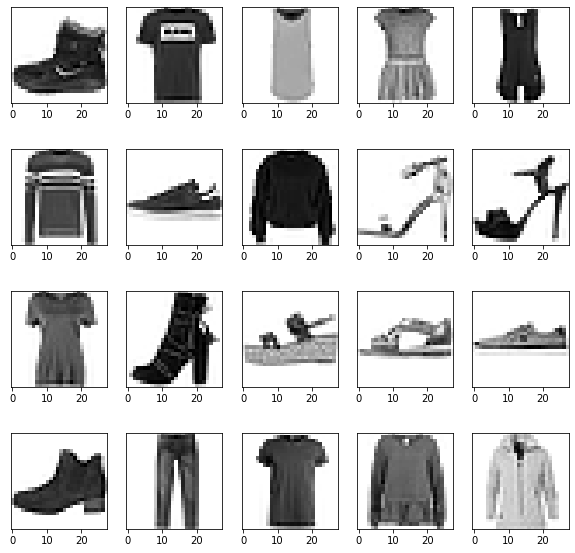

In [174]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1) #  index로 이미지 
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### activation
- 비선형 함수 사용하여 선형 분류 불가능 원래 데이터를 마지막에 선형분류 가능하도록 왜곡함
> Colah's blog post : https://colah.github.io/posts/2015-09-NN-Types-FP/
    - manifold learning(비선형 차원 축소)
- hidden layers의 activation function 필수
- sigmoid  레이어가 많아지면서 미분값이 계속0 에 가까워지면서 gradient vanishing 문제 생김
- relu (rectified) : 0보다 작으면 0, 크면 그값 그대로 
- softmax :값을 0~1사이로 확률값처럼 만들어줌

### activation 인자
- 문자열
    - 기본 default만 사용 가능 
        - 예 'relu'
-  함수
    - 소문자
    - tf의 keras.activations , nn package에 있음
    - functional paradigm 
    - 함수의 기본값 바꾸기 가능 
        - 예. tf.nn.relu
    - 함수는 first class function으로 객체로 쓰임
- functools partial로 가능 (decorator처럼 씀)하지만 복잡

In [16]:
tf.keras.activations.softmax is tf.nn.softmax

False

In [18]:
tf.nn.softmax

<function tensorflow.python.ops.nn_ops.softmax_v2(logits, axis=None, name=None)>

### layer
- layer많으면 데이터 많이 필요한데 적으면 overfitting
- 앞의 layer 가 feature extraction
    - Dense 1차원 
    - Flatten 2차원 형태의 데이터를 받으면 1차원화
    - convolution은 3차원 형태의 데이터 받음

In [33]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu') ,
    tf.keras.layers.Dense(64, activation=tf.nn.relu) ,
    tf.keras.layers.Dense(10, activation='softmax') # 마지막 결과값을 확률값처럼 나오게 바꿈(optional)
])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### compile 
학습전략
#### loss
- 문제 도메인에따라 정의된것을 사용
    - 실제값과 예측관을 어덯게 정의하는지
-  문자열:
    -   오타 조심
    - 'sparse_categorical_crossentropy'
- 소문자: 함수
    - snake 방식
    - sparse_categorical_crossentropy
- 대문자 : 객체(Camel 방식)
    - 상속, 인자값 바꾸기 가능 
    - 인스턴스화
    - SparseCategoricalCrossentropy()
#### optimizer
- gradient vanishing을 어떤 알고리즘으로 효율적으로 해결하는지
#### metrics
- 성능 비교 기준

In [36]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy()
             , optimizer='adam',metrics=['accuracy'])

In [35]:
type(tf.keras.losses.BinaryCrossentropy) #객체 ->상속

type

In [38]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy
             , optimizer='adam',metrics=['accuracy'])

In [176]:
model.compile(loss='sparse_categorical_crossentropy'
             , optimizer='adam',metrics=['accuracy'])

### 정규화 비교
- -1 ~ 1사이 ,  0 ~ 1 사이 loss차이 별로 없으나 정규화 안한 데이터와의 loss차이는 큼

In [90]:
X_train128= X_train/128 -1
X_test128= X_test/128 -1


X_train255= X_train/255
X_test255= X_test/255

In [41]:
model.fit(X_train, y_train,epochs=5) #정규화 안함

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 7.4696 - accuracy: 0.7839
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8608 - accuracy: 0.7531
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6688 - accuracy: 0.7850
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5719 - accuracy: 0.8054: 0s -
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4881 - accuracy: 0.8305


In [39]:
model.fit(X_train128, y_train,epochs=5) #-1 ~1사이

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2941 - accuracy: 0.8912
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8954
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2733 - accuracy: 0.8982
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2608 - accuracy: 0.9028
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2535 - accuracy: 0.9056


In [40]:
model.fit(X_train255, y_train,epochs=5) #0~1사이가 약간 더좋으나 유의미하지 않음

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9011: 0s - loss: 0.2732 - ac
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2510 - accuracy: 0.9067
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2420 - accuracy: 0.9090 - ETA: 0s - loss: 0.2424 - accuracy: 0.
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2320 - accuracy: 0.9127
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2279 - accuracy: 0.9143


#### evaluate
 - 성능 비교
 - fit처럼 학습하는게 아닌 predict예측을 하여 epochs없음 
 - 각 모델 변경해서 비교


return 2개
- loss
- compile(metrics=[]) 에서 지정한 기준
    - accuracy

In [175]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.8403


[0.47221264243125916, 0.8403000235557556]

In [93]:
model.predict(X_test)[1]

array([7.3015104e-07, 5.6198328e-21, 9.9999046e-01, 7.2664368e-09,
       1.8114480e-06, 0.0000000e+00, 7.0487154e-06, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [94]:
np.sum(model.predict(X_test)[1]) #softmax는 확률처럼 계산하여 합치면 1

1.0

arg max통해서 비교함

In [95]:
np.argmax(model.predict(X_test)[1]) #가장 큰 index 2번째 9.9999046e-01

2

### one-hot encoding
- to_categorical
    - label encoding된 y를 one-hot encoding함
    - tf,pandas, scikit-learn
    - 구분자 역할을 하므로 label encodin과 성능 차이는 없음

In [96]:
from tensorflow.keras.utils import to_categorical

In [120]:
y_train=to_categorical(y_train) #label encoding -> one-hot encoding
y_test=to_categorical(y_test)

In [121]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu') ,
    tf.keras.layers.Dense(64, activation='relu') ,
    tf.keras.layers.Dense(10, activation='softmax') 
])
# ont-hot encoding은 loss=categorical_crossentropy
model.compile(loss=tf.keras.losses.categorical_crossentropy
             , optimizer='adam',metrics=['accuracy'])

In [122]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9747 - accuracy: 0.7187
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6392 - accuracy: 0.7858
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5848 - accuracy: 0.8041
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5474 - accuracy: 0.8197
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5241 - accuracy: 0.8262


In [123]:
model.predict(X_test)[1]

array([3.08778509e-02, 1.92322186e-05, 9.27372396e-01, 3.81289283e-03,
       1.31704658e-02, 3.63758289e-07, 2.47033406e-02, 1.77165682e-09,
       4.34245449e-05, 1.13587175e-08], dtype=float32)

In [124]:
np.argmax(model.predict(X_test)[1]) #동일하게 2번째 

2

In [125]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.8126


[0.5764838457107544, 0.8126000165939331]

In [109]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu') ,
    tf.keras.layers.Dense(128, activation='relu') ,
    tf.keras.layers.Dense(10, activation='softmax') 
])

model.compile(loss=tf.keras.losses.categorical_crossentropy
             , optimizer='adam',metrics=['accuracy'])


In [126]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4939 - accuracy: 0.8330: 0s - loss: 0.4978 - 
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4787 - accuracy: 0.8387:  - ETA: 0s - loss: 0.4 - ETA: 0s - loss: 0.4795 - accura
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4476 - accuracy: 0.8462
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4289 - accuracy: 0.8530
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4156 - accuracy: 0.8545


In [129]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.8403


[0.47221264243125916, 0.8403000235557556]

딥러닝: 레이어가 많은 multi-layer perceptron
- 중요도 : layer > node
- layer지나갈때마다 데이터 공간 왜곡시키기 때문에 layer가 더 중요함

In [127]:
model.predict(X_test)[1]

array([1.2943549e-04, 2.7707601e-06, 9.5245993e-01, 1.9447411e-05,
       3.4199547e-02, 4.0986564e-10, 1.3178971e-02, 2.4738272e-11,
       9.8756491e-06, 7.3648536e-13], dtype=float32)

In [128]:
np.argmax(model.predict(X_test)[1]) #동일하게 2번째 

2

### 하이퍼파라미터 튜닝
- 모델 선택후 모델의 하이퍼파라미터를 비교 선택해야하는데 수동으로 하는데에 오래걸리므로 자동화 하는 방법이 있음
    - scikit 의 gridsearchCV
    - keras의 keras-tuner
        - 후자는 나중에

#### gridsearchCV
- 자동화된 하이퍼 파라미터 찾아서 최적화
- scikit-learn, keras 연동 가능 
    - keras GPU 지원하기 때문에 연동하면 scikit가능
    - KerasClassifier,  KerasRegressor 객체 인스턴스화 하여 사용 
####  KerasClassifier
- instance화
- =KerasClassifier( build_fn)
- classification 모델을 함수를 인자로 받음 

In [131]:
from sklearn.model_selection import GridSearchCV

In [111]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_model( ): 
    
    model=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu') ,
        tf.keras.layers.Dense(10, activation='softmax') 
    ])
    model.compile(loss=tf.keras.losses.categorical_crossentropy
             , optimizer='adam' ,metrics=['accuracy'])
    
    return model

In [117]:
def build_model(optimizer='adam'): 
    
    model=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu') ,
        tf.keras.layers.Dense(10, activation='softmax') 
    ])
    model.compile(loss=tf.keras.losses.categorical_crossentropy
             , optimizer=optimizer ,metrics=['accuracy'])
    
    return model

In [118]:
kc=KerasClassifier( build_fn=build_model) #함수로 받음 

In [119]:
kc.fit(X_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1200 - accuracy: 0.7389
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6686 - accuracy: 0.7858
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5926 - accuracy: 0.8022: 0s - loss: 0.5


hyper parameter 비교

In [139]:
kc=KerasClassifier( build_fn=build_model) 

In [140]:
grid=GridSearchCV(kc, param_grid={'optimizer':['adam', 'rmsprop','adadelta']} )

In [141]:
grid.fit(X_train,y_train, epochs=1)  #cross validaton까지 함 

1875/1875 [==============================] - 5s 3ms/step - loss: 1.8856 - accuracy: 0.7310


GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fbc46413a10>,
             iid='deprecated', n_jobs=None,
             param_grid={'optimizer': ['adam', 'rmsprop', 'adadelta']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

cv_results_
- GridSearchCV 한 결과로  학습 속도, cross validation score 값보여줌

adam > rmsprop >adadelta 순서

In [144]:
import pandas as pd
pd.DataFrame(grid.cv_results_) #adam이 젤 빠르고 score도 가낭 좋음

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.506421,0.133424,0.719778,0.011804,adam,{'optimizer': 'adam'},0.743000,0.777000,0.756917,0.785083,0.762833,0.764967,0.014842,1
1,4.408468,0.119489,0.730772,0.028407,rmsprop,{'optimizer': 'rmsprop'},0.790667,0.734167,0.765250,0.740750,0.762917,0.758750,0.020033,2
2,4.420342,0.152831,0.718596,0.009481,adadelta,{'optimizer': 'adadelta'},0.760000,0.751333,0.773583,0.750333,0.748500,0.756750,0.009301,3


0번째의 adam썼을때 가장 mean_test_score 성능 좋으며 76%

In [152]:
grid.best_estimator_,  grid.best_index_, grid.best_params_, grid.best_score_

(<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier at 0x7fbbafcd40d0>,
 0,
 {'optimizer': 'adam'},
 0.7649666666984558)

In [164]:
def build_model(node=64): 
    model=tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(node, activation='relu') ,
        tf.keras.layers.Dense(10, activation='softmax') 
    ])
    model.compile(loss=tf.keras.losses.categorical_crossentropy
             , optimizer='adam',metrics=['accuracy'])
    
    return model

### keras.wrappers.scikit_learn
- \*\*sk_params keras의 인자 입력 받을수 있어 scikit과 분리하여 사용 가능 
- composition :객체지향에서 감싸서 한 기법
    - fit대신에 KerasClassifier에 epochs=3, validation_split  지정

In [171]:
# keras.wrappers
kc=KerasClassifier( build_fn=build_model, epochs=3, validation_split=0.2) #함수로 받음 
# scikit-learn  
grid=GridSearchCV(kc,param_grid={'node':[64,128,256,512]},cv=2)

In [172]:
grid.fit(X_train,y_train)  #cross validaton까지 함 

Epoch 1/3
750/750 [==============================] - 2s 3ms/step - loss: 5.3863 - accuracy: 0.5885 - val_loss: 1.2273 - val_accuracy: 0.6603
Epoch 2/3
750/750 [==============================] - 2s 3ms/step - loss: 1.0572 - accuracy: 0.6665 - val_loss: 0.9887 - val_accuracy: 0.7015
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.8695 - accuracy: 0.6902
Epoch 1/3
750/750 [==============================] - 2s 3ms/step - loss: 5.6212 - accuracy: 0.6129 - val_loss: 1.2842 - val_accuracy: 0.6435
Epoch 2/3
750/750 [==============================] - 2s 2ms/step - loss: 1.0376 - accuracy: 0.6843 - val_loss: 0.9584 - val_accuracy: 0.7240
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.7980 - accuracy: 0.7200
Epoch 1/3
750/750 [==============================] - 2s 3ms/step - loss: 5.9064 - accuracy: 0.6657 - val_loss: 0.9699 - val_accuracy: 0.6902
Epoch 2/3
750/750 [==============================] - 2s 3ms/step - loss: 0.8601 - accuracy: 0.698

GridSearchCV(cv=2, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fbb8b326b90>,
             iid='deprecated', n_jobs=None,
             param_grid={'node': [64, 128, 256, 512]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [168]:
pd.DataFrame(grid.cv_results_) #node 많을 수록 성능 좋음

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_node,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,2.589822,0.030456,1.530855,0.048306,64,{'node': 64},0.644500,0.635400,0.639950,0.004550,4
1,3.056770,0.006862,1.708717,0.050557,128,{'node': 128},0.669367,0.652400,0.660883,0.008483,3
2,4.008876,0.344503,2.121944,0.360829,256,{'node': 256},0.730933,0.747067,0.739000,0.008067,2
3,4.587669,0.068915,2.314484,0.031204,512,{'node': 512},0.757200,0.783300,0.770250,0.013050,1


예측 모델 만들고나서 결과 확인하기 위해서 봐야함
ensemble 의 boosting 
- weak learner에 가중치를 더 넣어서 성능을 높임 


시행착오 해야하기 때문에 반복적으로 재사용해야함

---
## Neural Netes for Vison
CVPR 2012 Tutorial on Deep Larning part3
    - major 학회에서 제공한 tutorial
    
- gradient vanishing, 문제를 해결해서 신경망 재부활
- 2012 Imagenet의 AlexNet이 압도적 우승
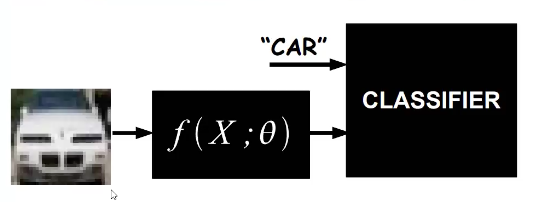

feature extractor 를 f(X; theta) 함수로 표현 가능
- 함수로 만들어 놓으면 문제를 parameterized function 가장 잘 되는 머신러닝 이용해서  파라미터를 찾음 
- features 효과적으로 계산되고 훈련됨
- end-to-end recognition system 으로 만들어서 feature extractor, classifier구분이 없어짐
- **합성함수(functon composition)로 더 복잡한 비선형 시스템** 만들어서 복잡한 분류 가능하게 됨
    - 각 레이어 함수의 **파라미터는 학습할 대상(trainable parameters)**
    - Sequential하게 feed forward함 
       - layer 함수는 activation과 합쳐져서 복잡한 비선형 시스템으로 만듦 

- 시스템은 계층적 특성 hierarchy of features 생성
    - 이전 레이어 기반으로 특성이 생김 
    - transfer learning, convolution이 이것을 이용함 
        - <> LesNet 건너 뜀..
    - 처음에는 간단한 직선에서 각 kernel이 조합되어 새로운 특성이 나왔으나 점점 유사한 특징이 나옴 
        - feature crossed(교차 특성):특성간의 곱으로 생김

DL model :
- generative model
    - 클래스 분포를 찾아서 어떻 새로운 데이터 들어왔을때 확률에 따라서 분류
    - 분포를 따르는 새로운 데이터를 만듦
    - ML의 Naive Bayes
- discriminant model
    - 결정 직선/평면 찾는 모델 
   
    
Key Idea
1. Learn features from data
    - 이전에는 사람이 특성 지정
2. Use differentiable functions(미분 가능한 함수) that produce features efficiently
    - gradient descent 방식으로 최적화하기 떄문에 미분 가능해야함
     - 단계별로 쪼개서 chainrule이용해서 효율적 학습 가능
3. End-to-end learning
    - no districiton between feature extractor and classifer
4. Deep architecture
    - cascade of simpler non-linar modules
---     
##  Neural Network
 - a stack of logistic regression classifiers
     - 예전에는 sigmoid를 활성함수를 사용해었기 때문
 - 학습 :Feed Forward & Back Propagation

### NN Architecture   
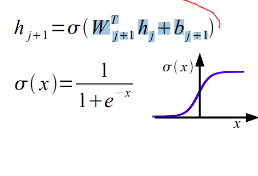
 - 이론적 **합성함수**
 - 실제 벡터연산 (효율적 연산)
     - 데이터가 선형결합해서 비선형 활성 함수에 들어감
- functional, array programming!!!


Graphical Notation
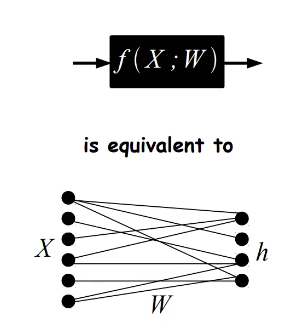
- 모델을 그래프로 표현 (h:feature, hidden unit,neuron)
- 확률기반, 선형 대수 기반으로 간단하게 표현

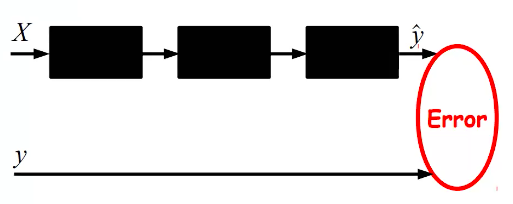

 - 예측값과 실제값값의 차이(Error)를 최소화 
 - loss function
     - classificaton : cross entropy 분포차이
     - regression:  mse
- node, layer수, layer 종류(Dense,Conv2D,,),loss
- loss, optimization(loss 최소화 하는 알고리즘), 


---

###  NN for vision
### Fully Connected Neural net
- 각 노드가 전체가 서로 연결됨 -> 복잡함
- 학습 파라미터가 많아서 과적합 가능
- 문제:  2차원 그림을  fully connected는 1차원 입력 받게되면 연관된 공간정보를 잃게됨 
    - pixel간의 의존성이 사라짐 
    - 1차원화 되면 각 이미지에 있는 객체의 위치마다 다르게 있어 특성 파악이 어려움 
    - mnist연습용 데이터들은 다 가운데에 위치
    - 공간 정보 이용불가, weight공유 안 함

#### Stationarity(고정성)
- 공간에 따라서 변하지 않는 특성
    - 1차원에서는 의미를 잃음
 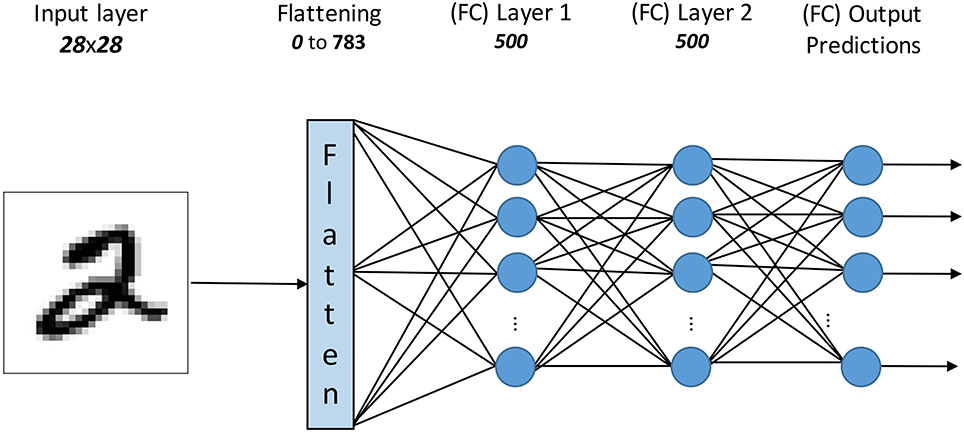
- convolution : 공간정보 유지하기 위해서 local 특징을 가장 잘 표현함
    - local부분만 계산해서 연관성을 보여줌
    - flip 하면 correlation 연산 결과가 동일한 형태
    - local부분 특징 뽑아서 변화된 값을 사용 가능




### Locally Conncected Neural Net
- receptive field 에 따라서 output달라짐
- **학습할 파라미터를 fcnn보다 적음**
- 커널을 다하는 것이 아닌 각 커널마다 웨이트가 공유하지 않아서 다름
    - LocallyConnected2D
    
#### Convoluition Neural Net
- **공간정보 이용**하기 떄문에 공간에 **stationarity** 존재하여 위치에 영향을 받지 않는 특성 추출 
- **shared weight* LCNN
    - 동일한 weight/kernel 로 전체 이미지 슬라이딩하여 이미지의 다른 위치에서 동일한 weight 재사용(공유)
    - 연산량 이 줄어들어 필요한 데이터 줄어듦
    - 여러개의 kernel/filters 통해서 값들이 무엇인지 파악
-  동시에 더 많은 feature extraction  하기 위해서 많은 maps를 훈련
- 특징이 맞으면 가장 큰값 
- 공간의 값을 하나의 값으로 대표함
     - Conv2D
참고 : https://pennlio.wordpress.com/2014/04/11/fully-connected-locally-connected-and-shared-weights-layer-in-neural-networks/

CNN by PyTorch https://www.cs.toronto.edu/~lczhang/360/lec/w04/convnet.html


In [ ]:
tf.keras.layers.Conv2D
tf.keras.layers.LocallyConnected2D